# Aggregate by industry_tag

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import sys  
import os
import dask.dataframe as dd
curr_path = str(Path(os.getcwd()).parent)
sys.path.append(curr_path)
from scripts.constants import *
from scripts.read import *

In [4]:
spark = create_spark()

23/10/12 16:35:58 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


### Define a function to read mapped_industry data

In [3]:
def read_mapped_industry_data(spark: SparkSession, prefix: str="") -> pd.DataFrame:
    """
    Reads curated consumer data
    - Parameters
        - spark: Start the spark session
        - prefix: Prefix used when accessing files from other directoriess
    - Returns
        - Pandas consumer dataframe
    """

    df = spark.read.csv(prefix+INDUSTRY_MAPPED, header=True, inferSchema=True)
    pandas_df = df.toPandas()
    return pandas_df

def read_merchant_fraud_probability(spark: SparkSession, prefix: str="") -> pd.DataFrame:
    """
    Reads curated consumer data
    - Parameters
        - spark: Start the spark session
        - prefix: Prefix used when accessing files from other directoriess
    - Returns
        - Pandas consumer dataframe
    """

    df = spark.read.csv(prefix+RAW_MERCHANT_FRAUD_PATH, header=True, inferSchema=True)
    pandas_df = df.toPandas()
    return pandas_df

### Define functions to plot the trend of the earnings trend of the industries

In [4]:
def plot_earning_mean_trends(df: pd.DataFrame, title: str, save_path: str):
    '''
    Plot a line chart of earning mean trends by industry
    - Parameters
        - df: Pandas dataframe
        - title: Title of the plot
        - save_path: Path to save the plot
    - Returns
        - None
    '''

    # set the year
    years = ['2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020']

    # plot the line chart
    plt.figure(figsize=(18, 10))
    sns.set_style("whitegrid")

    # iterate through each industry
    for industry in df[INDUSTRY_TAGS].unique():
        industry_data = df[df[INDUSTRY_TAGS] == industry]
        year_columns = ['eariningmean2015-2016', 'eariningmean2016-2017', 'eariningmean2017-2018', 'eariningmean2018-2019', 'eariningmean2019-2020']
        values = industry_data[year_columns].values[0]

        plt.plot(years, values, label=industry)

    # plot the legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # set title and label
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Earning Mean (in dollar)')

    plt.tight_layout()
    # Save the plot
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

def plot_earning_median_trends(df: pd.DataFrame, title: str, save_path: str):
    '''
    Plot a line chart of earning median trends by industry
    - Parameters
        - df: Pandas dataframe
        - title: Title of the plot
        - save_path: Path to save the plot
    - Returns
        - None
    '''

    # set the year
    years = ['2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020']

    # plot the line chart
    plt.figure(figsize=(18, 10))
    sns.set_style("whitegrid")

    # iterate through each industry
    for industry in df[INDUSTRY_TAGS].unique():
        industry_data = df[df[INDUSTRY_TAGS] == industry]
        year_columns = ['earningmedian2015-2016', 'earningmedian2016-2017', 'earningmedian2017-2018', 'earningmedian2018-2019', 'earningmedian2019-2020']
        values = industry_data[year_columns].values[0]

        plt.plot(years, values, label=industry)

    # plot the legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # set title and label
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Earning Median (in dollar)')

    plt.tight_layout()
    # Save the plot
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

def plot_earning_sum_trends(df: pd.DataFrame, title: str, save_path: str):
    '''
    Plot a line chart of earning sum trends by industry
    - Parameters
        - df: Pandas dataframe
        - title: Title of the plot
        - save_path: Path to save the plot
    - Returns
        - None
    '''

    # set the year
    years = ['2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020']

    # plot the line chart
    plt.figure(figsize=(18, 10))
    sns.set_style("whitegrid")

    # iterate through each industry
    for industry in df[INDUSTRY_TAGS].unique():
        industry_data = df[df[INDUSTRY_TAGS] == industry]
        year_columns = ['earningsum2015-2016', 'earningsum2016-2017', 'earningsum2017-2018', 'earningsum2018-2019', 'earningsum2019-2020']
        values = industry_data[year_columns].values[0]

        plt.plot(years, values, label=industry)

    # plot the legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # set title and label
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Earning Sum (in hundred millions)')

    plt.tight_layout()
    # Save the plot
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

def plot_earners_trends(df: pd.DataFrame, title: str, save_path: str):
    '''
    Plot a line chart of earners trends by industry
    - Parameters
        - df: Pandas dataframe
        - title: Title of the plot
        - save_path: Path to save the plot
    - Returns
        - None
    '''

    # set the year
    years = ['2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020']

    # plot the line chart
    plt.figure(figsize=(18, 10))
    sns.set_style("whitegrid")

    # iterate through each industry
    for industry in df[INDUSTRY_TAGS].unique():
        industry_data = df[df[INDUSTRY_TAGS] == industry]
        year_columns = ['earners2015-2016', 'earners2016-2017', 'earners2017-2018', 'earners2018-2019', 'earners2019-2020']
        values = industry_data[year_columns].values[0]

        plt.plot(years, values, label=industry)

    # plot the legend
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # set title and label
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Earning Sum (in hundred millions)')

    plt.tight_layout()
    # Save the plot
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

### Read the mapped_industry data, transaction_all data, fraud probability data, and conusmer data

In [5]:
mapped_industry_data = read_mapped_industry_data(spark, prefix=".")
transaction_all = read_curated_transactions_all(spark, prefix=".")
merchant_fraud_probability = read_merchant_fraud_probability(spark, prefix=".")
consumer= read_curated_consumer_external_join(spark, prefix=".")
merchants = read_curated_tbl_merchant(spark, '.')

23/10/12 13:44:34 WARN DataSource: [COLUMN_ALREADY_EXISTS] The column `order_datetime` already exists. Consider to choose another name or rename the existing column.


23/10/12 13:44:35 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


## Task1: Find the average and median dollar value of each industry(tag)
- First step is to join the transaction all with the mapped_industry data

- Then group by industry_tag and find the average and median dollar value

- The result shows that "jewelry watch clock silverware" industry has the higest average dollar value (9396.485) and median dollar value (7759.340)

- "digital goods books movies music" is the industry which has the lowest average dollar value (64.205)

- "tent awning" is the industry which has the lowest median dollar value (24.67)

In [7]:
# only keep the column we need in transaction_all
new_transaction_all = transaction_all.select(MERCHANT_ABN, DOLLAR_VALUE, ORDER_ID)

# drop the duplicates in transaction_all
transaction_all_with_no_duplicates = new_transaction_all.dropDuplicates([ORDER_ID])

# transfer to the pandas dataframe
transaction_all_with_no_duplicates_pd = transaction_all_with_no_duplicates.toPandas()

# join the transaction_all with mapped_industry_data on merchant_abn
joined_transaction_and_mapped_industry = pd.merge(transaction_all_with_no_duplicates_pd, mapped_industry_data, on=MERCHANT_ABN, how=INNER_JOIN)

# calculate average dollar_value
average_dollar_value_per_tag = joined_transaction_and_mapped_industry.groupby([INDUSTRY_TAGS, MAPPED_INDUSTRIES])[DOLLAR_VALUE].mean().reset_index()

# calculate median dollar_value
median_dollar_value_per_tag = joined_transaction_and_mapped_industry.groupby([INDUSTRY_TAGS, MAPPED_INDUSTRIES])[DOLLAR_VALUE].median().reset_index()

# merge and sort
average_and_median_dollar_value_per_tag = pd.merge(average_dollar_value_per_tag, median_dollar_value_per_tag, on=[INDUSTRY_TAGS, MAPPED_INDUSTRIES], suffixes=(AVERAGE_SUFFIX, MEDIAN_SUFFIX))
average_and_median_dollar_value_per_tag = average_and_median_dollar_value_per_tag.sort_values(by=[DOLLAR_VALUE+AVERAGE_SUFFIX], ascending=False)

# around the dollar_value_avg and dollar_value_median to 3 decimal places
average_and_median_dollar_value_per_tag[DOLLAR_VALUE+AVERAGE_SUFFIX] = average_and_median_dollar_value_per_tag[DOLLAR_VALUE+AVERAGE_SUFFIX].round(3)
average_and_median_dollar_value_per_tag[DOLLAR_VALUE+MEDIAN_SUFFIX] = average_and_median_dollar_value_per_tag[DOLLAR_VALUE+MEDIAN_SUFFIX].round(3)

average_and_median_dollar_value_per_tag

,industry_tags,MappedIndustry,dollar_value_avg,dollar_value_median
15,jewelry watch clock silverware,A,9396.485,7759.340
1,art dealers galleries,L,2044.126,1522.660
22,telecom,Q,1750.604,1212.480
9,equipment tool furniture appliance rent al lea...,S,1292.337,598.880
21,stationery office printing writing paper,D,459.566,371.155
17,motor vehicle new parts,H,360.641,234.960
0,antique repairs restoration,R,358.957,126.020
3,bicycle,Y,315.653,111.300
16,lawn garden supply outlets including nurseries,W,313.829,194.600
13,health beauty spas,N,298.152,210.770


In [8]:
# save the average_and_median_dollar_value_per_tag to csv
PATH = CURATED_AVERAGE_AND_MEDIAN_DOLLAR_PER_TAG_PATH
average_and_median_dollar_value_per_tag.to_csv('.'+ PATH, index=False)

## Task2: Find the number of transactions per industry(tag)
- "tent awning" industry has the highest number of transactions (1392183), even it has the lowest dollar value (24.67) and relatively low average dollar value (81.442)

- "jewelry watch clock silverware" industry has the lowest number of transactions (3749), even it has the highest dollar value (9396.485) and the highest average dollar value (7759.340)

- In general, the industry with high avergae/median dollar value has low number of transactions

In [9]:
# group by industry_tags and MappedIndustry, and count the number of order_id in each group
number_of_transactions = joined_transaction_and_mapped_industry.groupby([INDUSTRY_TAGS, MAPPED_INDUSTRIES])[ORDER_ID].count().reset_index()

# rename the column and sort by number_of_transactions
number_of_transactions.rename(columns={ORDER_ID: NUM_TRANSACTIONS}, inplace=True)
number_of_transactions = number_of_transactions.sort_values(by=[NUM_TRANSACTIONS], ascending=False)

number_of_transactions

,industry_tags,MappedIndustry,600
23,tent awning,X,1392183
12,gift card novelty souvenir,P,1257554
8,digital goods books movies music,F,984798
24,watch clock jewelry repair,V,791205
5,cable satellite pay television radio,K,733993
10,florists nursery stock flowers,U,675641
19,opticians optical goods eyeglasses,I,647307
7,computers computer peripheral equipment software,J,551214
6,computer programming data processing integrate...,C,397913
11,furniture home furnishings equipment manufactu...,T,381976


In [10]:
# save the number_of_transactions to csv
PATH = CURATED_NUMBER_OF_TRANSACTIONS_PATH
number_of_transactions.to_csv('.'+ PATH, index=False)

## Task3: Find the average and median fraud probability of each industry(tag)
- "watch clock jewelry repair" has the highest average fraud probability and the highest median fraud probability (63.377)

- "cable satellite pay television radio" has the lowest average fraud probability and the lowest median fraud probability(28.504)

In [11]:
# merge transaction data with fraud prob
fraud_prob_and_industry = pd.merge(joined_transaction_and_mapped_industry, merchant_fraud_probability, on=MERCHANT_ABN, how=INNER_JOIN)

# calculate the average fraud probability for each industry_tags and MappedIndustry
average_fraud_prob = fraud_prob_and_industry.groupby([INDUSTRY_TAGS, MAPPED_INDUSTRIES])[FRAUD_PROBABILITY].mean().reset_index()

# calculate the median fraud probability for each industry_tags and MappedIndustry
median_fraud_prob = fraud_prob_and_industry.groupby([INDUSTRY_TAGS, MAPPED_INDUSTRIES])[FRAUD_PROBABILITY].median().reset_index()

# merge and sort
average_and_median_fraud_prob = pd.merge(average_fraud_prob, median_fraud_prob, on=[INDUSTRY_TAGS, MAPPED_INDUSTRIES], suffixes=(AVERAGE_SUFFIX, MEDIAN_SUFFIX))
average_and_median_fraud_prob = average_and_median_fraud_prob.sort_values(by=[FRAUD_PROBABILITY+AVERAGE_SUFFIX], ascending=False)

# around the fraud_probability_avg and fraud_probability_median to 3 decimal places
average_and_median_fraud_prob[FRAUD_PROBABILITY+AVERAGE_SUFFIX] = average_and_median_fraud_prob[FRAUD_PROBABILITY+AVERAGE_SUFFIX].round(3)
average_and_median_fraud_prob[FRAUD_PROBABILITY+MEDIAN_SUFFIX] = average_and_median_fraud_prob[FRAUD_PROBABILITY+MEDIAN_SUFFIX].round(3)

average_and_median_fraud_prob

,industry_tags,MappedIndustry,fraud_probability_avg,fraud_probability_median
20,watch clock jewelry repair,V,63.377,63.377
8,florists nursery stock flowers,U,63.141,61.924
4,books periodicals newspapers,G,62.993,62.993
1,art dealers galleries,L,53.287,52.408
3,bicycle,Y,40.732,40.732
12,jewelry watch clock silverware,A,34.751,33.820
0,antique repairs restoration,R,32.894,30.914
19,tent awning,X,31.995,30.413
18,telecom,Q,31.895,31.537
16,shoe,B,31.688,31.344


In [16]:
# save the average_and_median_fraud_prob to csv
PATH = CURATED_AVERAGE_AND_MEDIAN_FRAUD_PROB_PATH
average_and_median_fraud_prob.to_csv('.'+ PATH, index=False)

## Task4: Earning trend of customer in each industry(tag)

### Step1: use the ratio to get the real earning information for each consumer

In [13]:
# seelct the columns we need
earning_columns = [col for col in consumer.columns if any(keyword in col for keyword in ['consumer_id', 'ratio', 'earning', 'earin', 'earner'])]

# transfer to the pandas dataframe
consumer_earning = consumer[earning_columns]
consumer_earning_pd = consumer_earning.toPandas()

# change the data type
consumer_earning_pd[RATIO] = consumer_earning_pd[RATIO].astype(float)
columns_to_convert = consumer_earning_pd.columns.difference([CUSTOMER_ID, RATIO])
consumer_earning_pd[columns_to_convert] = consumer_earning_pd[columns_to_convert].astype(int)

# get the real earning information for each consumer
consumer_earning_pd = consumer_earning_pd.assign(**{col: consumer_earning_pd[col] * consumer_earning_pd[RATIO] for col in consumer_earning_pd.columns if col not in [CONSUMER_ID, RATIO]})
consumer_earning_pd = consumer_earning_pd.drop(columns=[RATIO])
consumer_earning_pd = consumer_earning_pd.groupby([CONSUMER_ID]).mean().reset_index()

### Step2: preprocessing transaction_all data

In [14]:
# only keep the column we need in transaction_all also drop the duplicates in transaction_all
transaction_all_with_consumer_id = transaction_all.select(MERCHANT_ABN, CONSUMER_ID, ORDER_ID)
transaction_all_with_consumer_id_with_no_duplicates = transaction_all_with_consumer_id.dropDuplicates([ORDER_ID])

# transfer to the pandas dataframe
transaction_all_with_consumer_id_with_no_duplicates_pd = transaction_all_with_consumer_id_with_no_duplicates.toPandas()

### Step3: merge the transaction data with the consumer_earning data, also merge with the mapped_industry data, to get the average earning information for each industry

In [15]:
# merge the data
consumer_earning_and_transaction = pd.merge(consumer_earning_pd, transaction_all_with_consumer_id_with_no_duplicates_pd, on=CONSUMER_ID, how=INNER_JOIN)
consumer_earning_and_transaction_and_industry = pd.merge(consumer_earning_and_transaction, mapped_industry_data, on=MERCHANT_ABN, how=INNER_JOIN)
earning_columns = columns_to_convert.drop(CONSUMER_ID)

# group by the industry_tags and MappedIndustry, and calculate the average earning for each group
average_earning = consumer_earning_and_transaction_and_industry.groupby([INDUSTRY_TAGS, MAPPED_INDUSTRIES])[earning_columns].mean().reset_index()
average_earning[earning_columns] = average_earning[earning_columns].round(3)

average_earning

,industry_tags,MappedIndustry,eariningmean2015-2016,eariningmean2016-2017,eariningmean2017-2018,eariningmean2018-2019,eariningmean2019-2020,earners2015-2016,earners2016-2017,earners2017-2018,...,earningmedian2015-2016,earningmedian2016-2017,earningmedian2017-2018,earningmedian2018-2019,earningmedian2019-2020,earningsum2015-2016,earningsum2016-2017,earningsum2017-2018,earningsum2018-2019,earningsum2019-2020
0,antique repairs restoration,R,34670.507,35684.970,36146.995,37206.654,36951.683,3085.720,3192.711,3264.316,...,27504.943,28171.037,28938.429,29955.205,30030.508,1.834559e+08,1.934443e+08,2.019776e+08,2.111549e+08,2.148712e+08
1,art dealers galleries,L,34759.433,35788.333,36189.890,37252.102,37000.736,3093.048,3200.505,3273.306,...,27575.187,28237.792,28975.454,29996.579,30083.054,1.844016e+08,1.944983e+08,2.027839e+08,2.120602e+08,2.157124e+08
2,artist supply craft,E,34624.268,35636.257,36093.793,37160.863,36894.902,3081.830,3188.700,3260.475,...,27465.352,28130.618,28893.508,29913.602,29988.411,1.832247e+08,1.931784e+08,2.016740e+08,2.108702e+08,2.145058e+08
3,bicycle,Y,34646.097,35661.330,36113.659,37170.167,36917.873,3083.298,3189.943,3261.769,...,27481.507,28145.736,28906.878,29926.261,30005.182,1.833713e+08,1.933384e+08,2.018655e+08,2.110118e+08,2.147044e+08
4,books periodicals newspapers,G,34619.763,35637.229,36083.702,37150.967,36880.943,3080.114,3186.757,3258.487,...,27467.802,28132.624,28892.457,29914.076,29986.894,1.831025e+08,1.930771e+08,2.015453e+08,2.107269e+08,2.143651e+08
5,cable satellite pay television radio,K,34696.029,35716.092,36167.687,37237.844,36969.105,3089.468,3196.290,3268.101,...,27520.150,28187.278,28950.961,29975.138,30048.304,1.838001e+08,1.938004e+08,2.022873e+08,2.115227e+08,2.151777e+08
6,computer programming data processing integrate...,C,34653.671,35665.076,36121.497,37184.024,36912.653,3081.307,3187.912,3259.728,...,27496.173,28160.238,28923.519,29942.150,30016.048,1.831458e+08,1.930917e+08,2.015668e+08,2.107611e+08,2.143905e+08
7,computers computer peripheral equipment software,J,34593.826,35608.061,36066.072,37134.356,36874.940,3084.977,3191.761,3263.765,...,27442.467,28106.177,28867.695,29887.902,29963.205,1.835833e+08,1.935647e+08,2.021012e+08,2.113296e+08,2.150237e+08
8,digital goods books movies music,F,34661.852,35676.845,36136.385,37199.875,36935.992,3089.476,3196.304,3268.288,...,27489.504,28153.849,28918.194,29937.284,30012.564,1.838620e+08,1.938432e+08,2.023694e+08,2.115836e+08,2.152572e+08
9,equipment tool furniture appliance rent al lea...,S,34674.083,35703.111,36158.813,37249.346,36988.804,3078.873,3185.322,3256.892,...,27483.910,28145.283,28912.181,29931.439,30011.964,1.830620e+08,1.929967e+08,2.014040e+08,2.106268e+08,2.142516e+08


In [20]:
# save the average_earning to csv
PATH = CURATED_AVERAGE_EARNING_PATH
average_earning.to_csv('.'+ PATH, index=False)

In [16]:
# only select the data in average_earning where MappedIndustry is X or P or F
top3_average_earning = average_earning[average_earning[MAPPED_INDUSTRIES].isin(['X', 'P', 'F'])]

# save the top3_average_earning to csv
CURATED_TOP3_AVERAGE_EARNING_PATH = f"{TABLES_DIR}top3_average_earning{CSV}"
TOP3_PATH = CURATED_TOP3_AVERAGE_EARNING_PATH
top3_average_earning.to_csv('.'+ TOP3_PATH, index=False)

#### Earning mean and median trend for the customers from all industry: 
- The earning mean of the customer from all industry increases before 2018 but decreases from 2019 to 2020
- the customers of “health beauty spas” always have the highest mean and median earnings from 2015-2020 (mean:37069.408, median: 30114.714)
- the custoers “telecom” always have the lowest mean and median earnings from 2015-2020 (mean: 36676.636, median: 29815.311)
- Suprisingly, the customers of “jewelry watch clock silverware” have the second lowest mean earnings from 2015-2020 (mean: 36676.636, median: 29862.634)

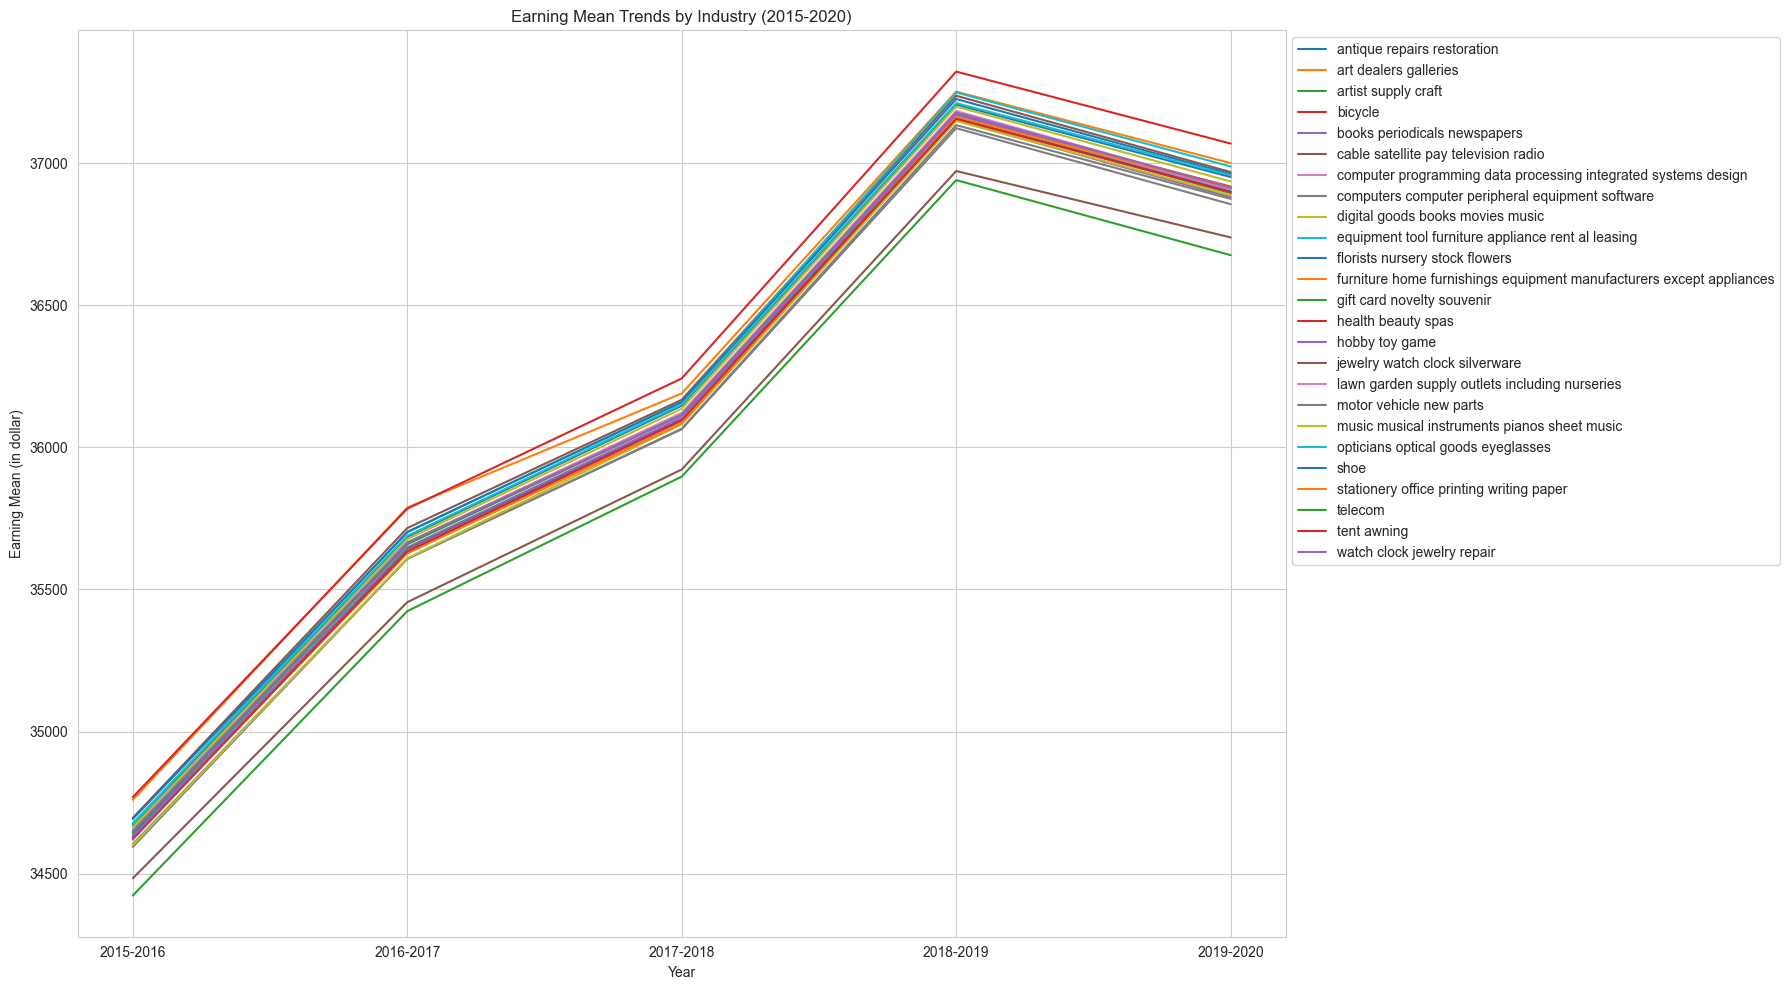

In [17]:
# plot the trend
plot_earning_mean_trends(average_earning, 'Earning Mean Trends by Industry (2015-2020)', '.'+EARNING_MEAN_TREND_PLOT_PATH)

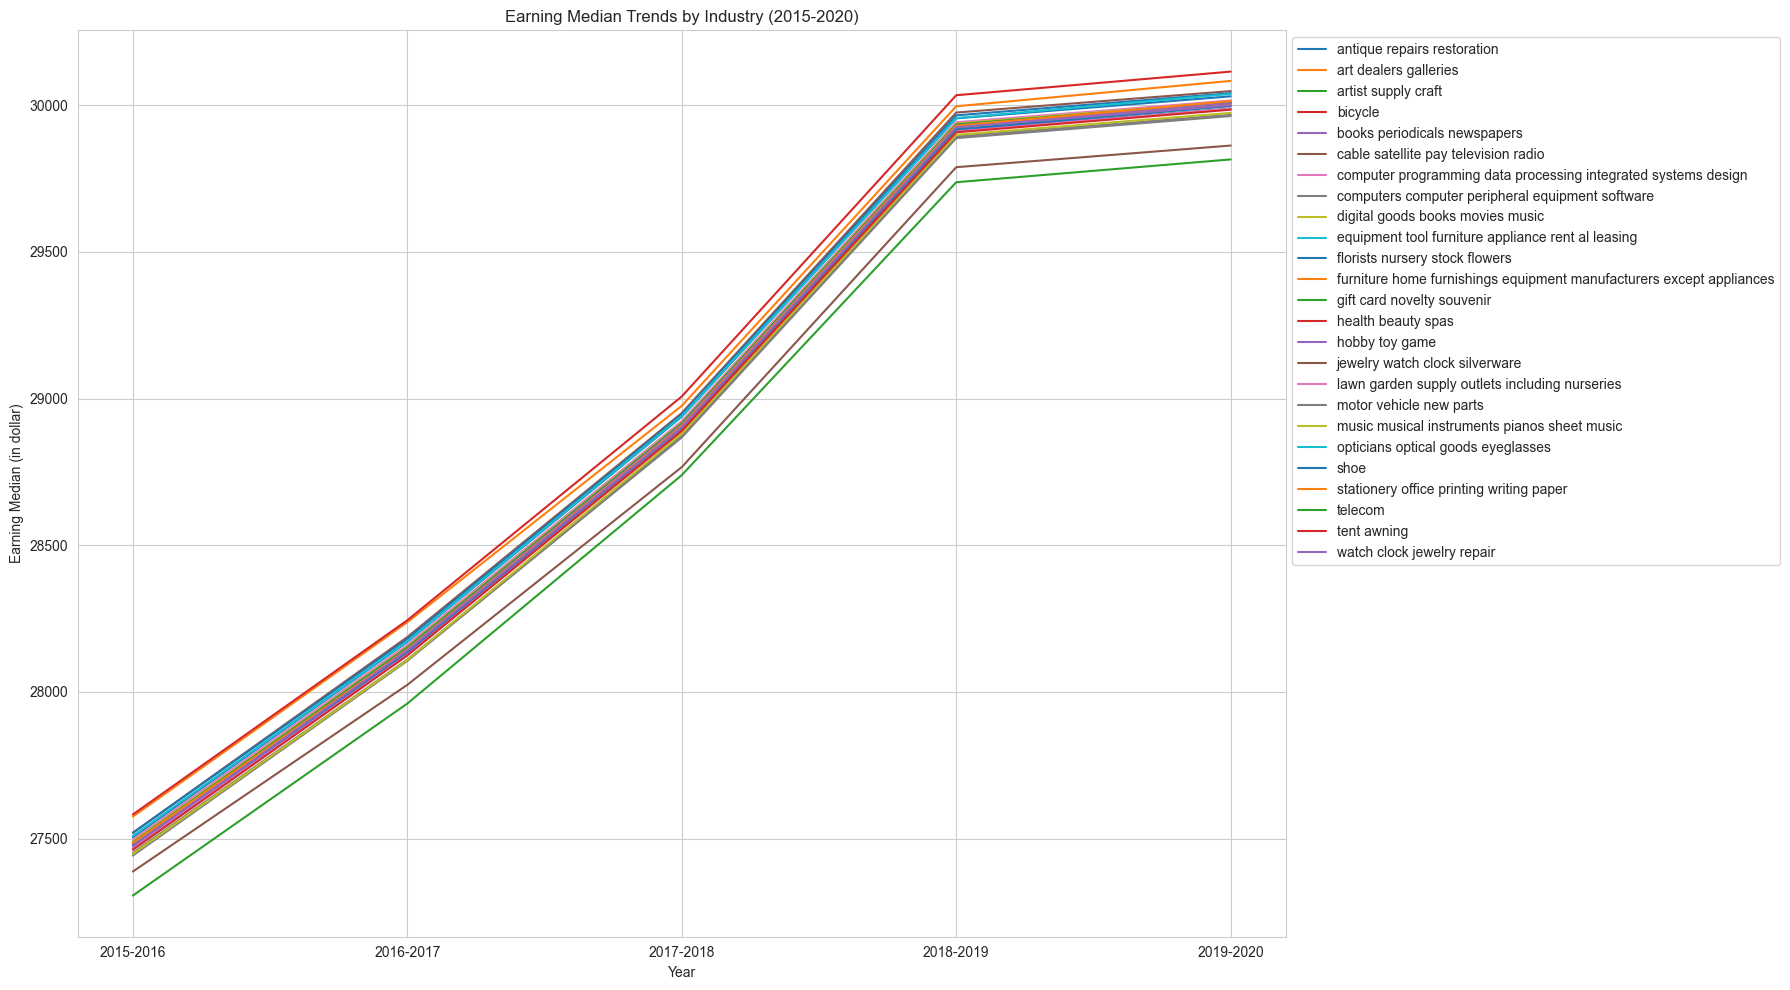

In [18]:
# plot the earning median trend for each industry_tags and MappedIndustry
plot_earning_median_trends(average_earning, 'Earning Median Trends by Industry (2015-2020)', '.'+EARNING_MEDIAN_TREND_PLOT_PATH)

#### Earning median trend for the customers from all industry:
- The customers of "art dealers galleries" has the highest earnings sum from 2015-2020 (2.157 hundred million)
- "health beauty spas" has the second highest earnings sum from 2015-2020 (2.156 hundred million)
- The customers of "jewelry watch clock silverware" has the third highest earnings sum from 2015-2020 (2.155 hundred million)
- The customers of "telecom" has the lowest earnings sum from 2015-2020 (2.122 hundred million)

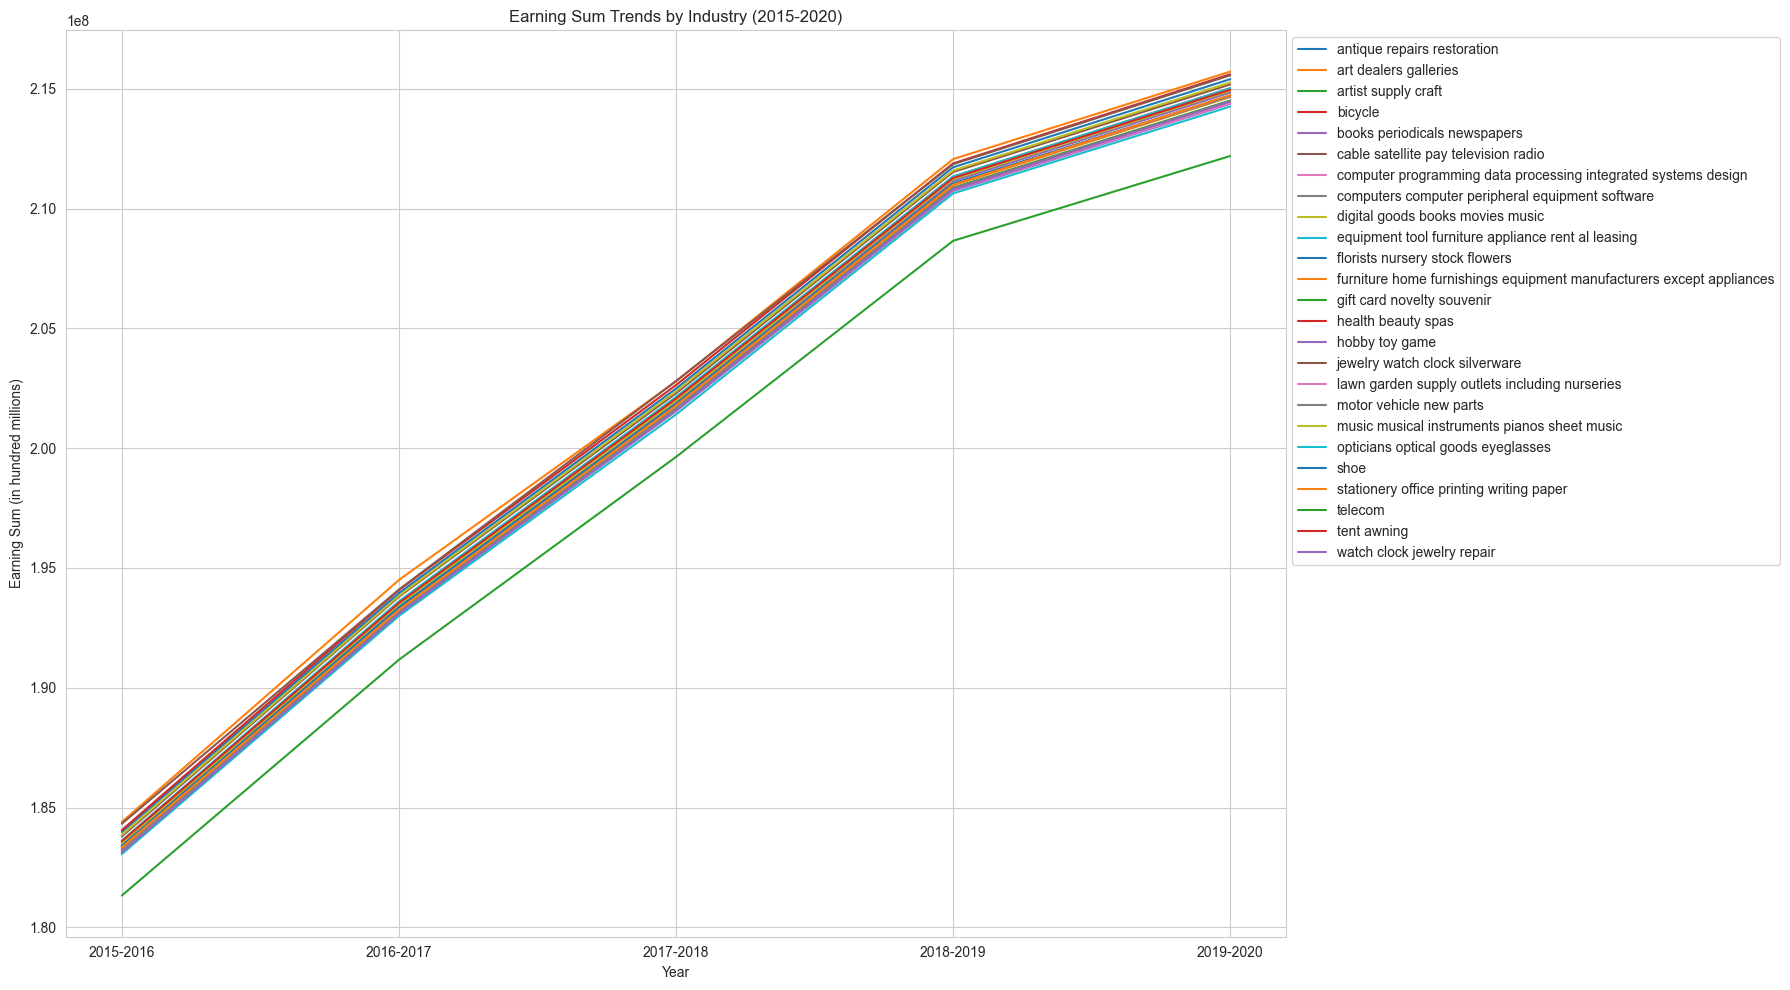

In [19]:
# plot the earning sum trend for each industry_tags and MappedIndustry
plot_earning_sum_trends(average_earning, 'Earning Sum Trends by Industry (2015-2020)', '.'+EARNING_SUM_TREND_PLOT_PATH)

#### Earners trend for the customers from all industry:
- "jewelry watch clock silverware" has the highest number of earners from 2015-2020 (3366)
- "telecom" has the lowest number of earners from 2015-2020 (3314)

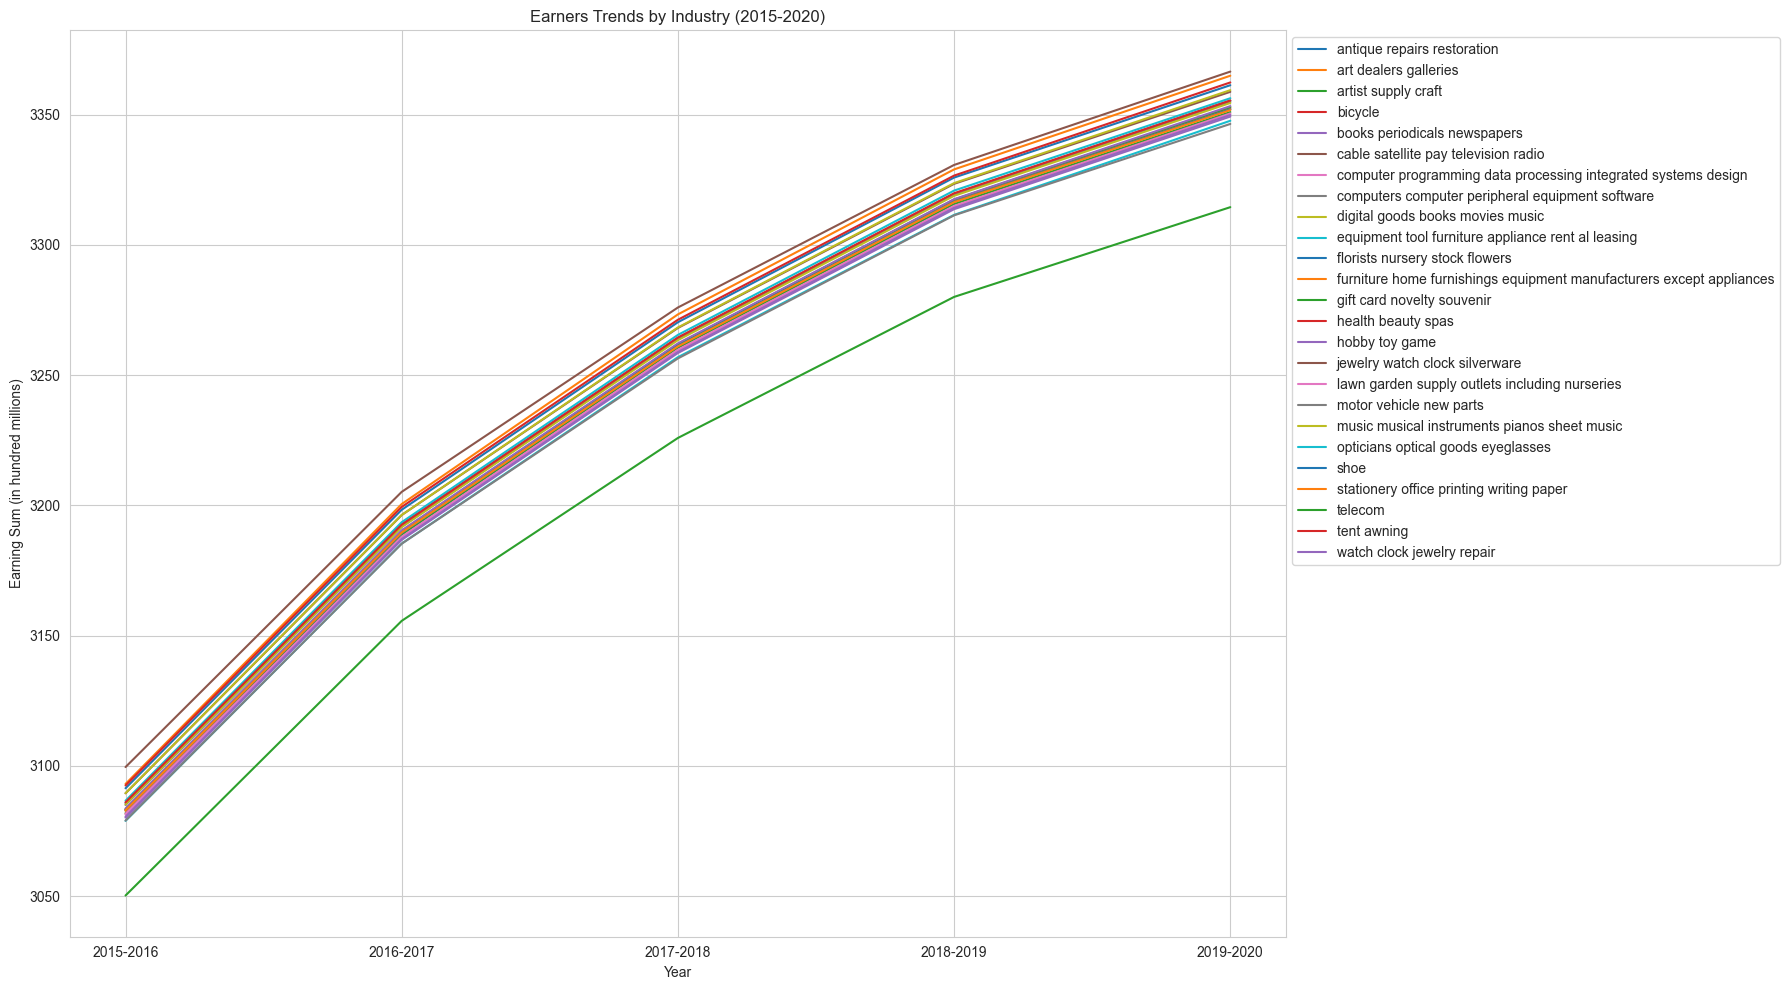

In [20]:
plot_earners_trends(average_earning, 'Earners Trends by Industry (2015-2020)', '.'+EARNERS_TREND_PLOT_PATH)